<a href="https://colab.research.google.com/github/Aakash-Sreeram/2216162_AIML_Bootcamp_2023/blob/main/ML/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AIML Bootcamp 2023/SUV_Purchase.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


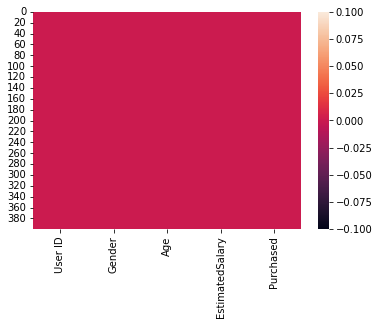

In [ ]:
import seaborn as sb 
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sb.heatmap(df.isnull())
  return plt.show()

get_heatmap(df)

**Data Preprocessing**

In [ ]:
from sklearn import preprocessing
#Label Encoding
LE=preprocessing.LabelEncoder()

#Fitting the techiniques to the dataset
df.Gender=LE.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


Data Visualisation

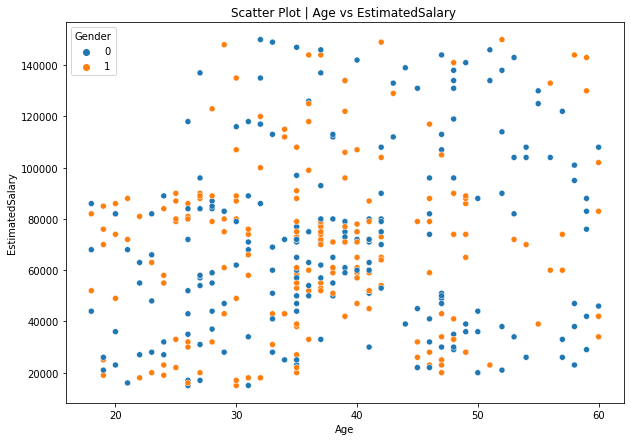

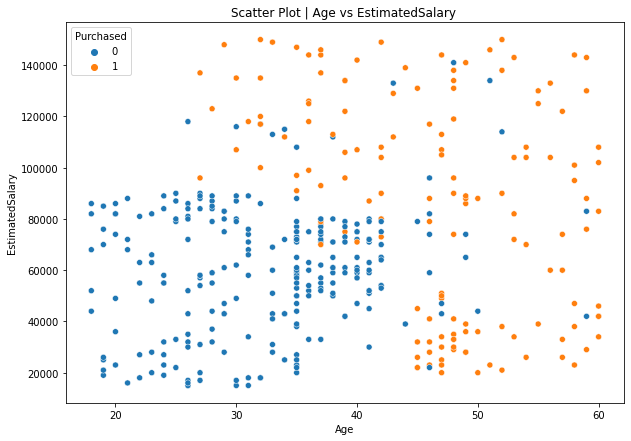

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2} ")
  
plot_vs(df,'Age','EstimatedSalary','Gender')
plot_vs(df,'Age','EstimatedSalary','Purchased')

In [ ]:
#Feature Engineering
df=df.drop(['User ID', 'Gender'], axis=1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#Method 1
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values


#Method 2  Optional
#import numpy as np
#X1=np.array(df[['Age','EstimatedSalary']])
#Y1=np.array(df[['Purchased']])

In [ ]:
# Splitting the data set into training set and Testing set
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#Normalising the data - Standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)   #Normalizing
X_test=sst.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
model.score(sst.transform(X),Y)

0.8425

In [ ]:
model.score(X_train,Y_train)

0.821875

In [ ]:
model.score(X_test,Y_test)

0.925

In [ ]:
model.score(sst.transform(X),Y)